In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family = "MicroSoft YaHei", weight = "bold") # 防止中文乱码

#### 简单起见只考虑解
$$
\frac{1}{2}||y-x\beta||^2+\mu||\beta||_{1,2}
$$
#### 的问题，其中$\beta$是一维向量，解法是采用近似点梯度（可能先实现次梯度下降，效率不重要）

#### 首先考虑p小于n的情形，方便做聚类

In [195]:
import random
p = 100 #beta的维度
n = 1000000 #样本个数

#初始化真实的beta
beta = np.random.randn(p)
div = [[0,20],[20,100]] #分组方式

beta[div[1][0]:div[1][1]] = 0
x = np.zeros([n,p])
a = np.random.randn(20,20)
x[:,:20] = np.random.multivariate_normal(np.zeros(20),np.dot(a.T,a),n)
x[:,20:60] = 2+2*np.random.randn(n,40)
x[:,60:100] = 3+np.random.randn(n,40)
y = np.dot(x,beta)
mu = 1e-2


In [183]:
from sklearn.cluster import KMeans
mean_var = np.zeros([p,2])
for i in range(p):
    mean_var[i,0] = np.mean(x[:,i])
    mean_var[i,1] = np.var(x[:,i])

res = KMeans(n_clusters=2,random_state=9).fit_predict(mean_var)
res

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [172]:
res_raw = KMeans(n_clusters=2,random_state=9).fit_predict(x.T)
res_raw

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [196]:
for i in range(p):
    x[:,i] /= np.linalg.norm(x[:,i])
res_std = KMeans(n_clusters=2,random_state=9).fit_predict(x.T)
res_std

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

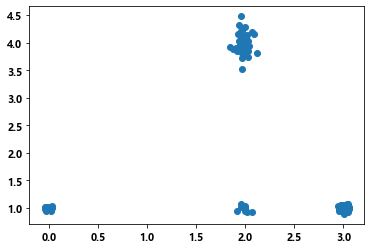

In [159]:
plt.scatter(mean_var[:,0],mean_var[:,1])
plt.show()

In [197]:
abs(np.corrcoef(x.T)[0])>np.sum(abs(np.corrcoef(x.T)[0][1:]))*0.01

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [198]:
np.corrcoef(x.T)[0]

array([ 1.00000000e+00,  3.34669618e-01,  1.25978879e-01,  6.16792504e-02,
        1.51540049e-01, -4.50183479e-01, -5.17982457e-01,  1.81916178e-02,
        2.59004194e-01,  7.77485326e-02,  1.17016856e-01,  2.78947968e-01,
       -3.85515726e-01, -1.82383848e-01,  1.58193215e-01,  1.54243052e-01,
        1.49115718e-01, -7.30702406e-03, -4.90456963e-02,  1.94810830e-01,
        3.98069862e-04,  1.16186262e-04,  9.87903808e-04,  3.20174099e-04,
       -3.91135719e-04,  7.22802143e-04, -1.26839517e-04,  1.30974006e-03,
       -9.93671105e-04,  1.32076585e-03, -2.18587562e-04,  1.69524021e-03,
        6.52376556e-04,  6.07352725e-04,  1.00598915e-03, -5.41540317e-04,
        6.12796888e-04, -1.48123681e-03,  1.43102316e-03,  6.24269361e-04,
        6.74706830e-04,  6.73378316e-04, -7.68010330e-04,  2.04493756e-03,
       -2.11255149e-04,  5.99990250e-04, -1.92523403e-03,  6.90838958e-04,
       -1.29516918e-03,  4.32857729e-04, -1.30222473e-03,  2.30889521e-04,
        3.54917462e-04,  

In [ ]:
def find_div(array): #传入聚类之后的array
    

In [163]:
#定义求值的函数
def f(y,x,beta,mu,div):
    return 0.5*np.linalg.norm(y-np.dot(x,beta), ord=2)**2+mu*g(beta,div)

def g(beta,div):
    s = 0
    for dd in div:
        s += np.linalg.norm(beta[dd[0]:dd[1]],ord=2)
    return s

def subgradient(beta,div):
    sub = np.zeros(beta.shape)
    for dd in div:
        if np.linalg.norm(beta[dd[0]:dd[1]])>0:
            sub[dd[0]:dd[1]] = beta[dd[0]:dd[1]]/np.linalg.norm(beta[dd[0]:dd[1]])
    return sub

def sub_dec(x,y,mu,beta0,div):
    k = 0
    t = 1e-3
    beta = beta0.copy()
    val = [f(y,x,beta,mu,div)]
    bb = [beta]
    mu0 = mu*10000
    while mu0 > mu:
        k = 0
        s = 0
        while k < 500:
            beta -= t*(np.dot(x.T,np.dot(x,beta)-y)+mu0*subgradient(beta,div))
            ff = f(y,x,beta,mu0,div)
            if abs(ff-val[-1]) < 0.1**(3+s):
                break
            val.append(ff)
            bb.append(beta)
            k += 1
        mu0 /= 10
        s += 1
    k = 0
    while k < 500:
        beta -= t*(np.dot(x.T,np.dot(x,beta)-y)+mu*subgradient(beta,div))
        ff = f(y,x,beta,mu,div)
        if abs(ff-val[-1]) < 1e-8:
            break
        val.append(ff)
        bb.append(beta)
        k += 1
    return beta,val


def sparsity(beta):
    return np.sum(beta>1e-6*np.sum(abs(beta)))/len(beta)

In [164]:
beta0 = np.random.rand(p)
mu = 1e-2
beta_r,val = sub_dec(x,y,mu,beta0,div)
div_f = [[5*i,5*i+5] for i in range(200)]
beta_f,val_f = sub_dec(x,y,mu,beta0,div_f)

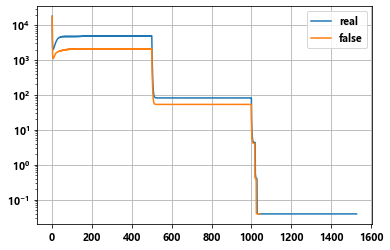

real:0.43 false:0.36


In [165]:
plt.semilogy(val)
plt.semilogy(val_f)
plt.legend(['real','false'])
plt.grid(True)
plt.show()
print('real:%.2f'%sparsity(beta_r),'false:%.2f'%sparsity(beta_f))

In [146]:
beta_f[:20]

array([-1.75488417e+00,  4.08652263e-01, -5.33956948e-06, -4.31610804e-06,
       -3.54574502e-07,  2.23642299e-05, -7.08633168e-07, -6.71256770e-06,
       -1.51438573e-05,  5.47766270e-06, -1.87636878e-05, -1.62869837e-05,
       -7.58620718e-06, -1.58353589e-06,  4.01273213e-06,  1.85665835e-05,
       -1.75436900e-05, -1.08302645e-05, -7.55732546e-07, -6.68030904e-06])

In [155]:
div_f = [[i,i+1]for i in range(p)]
beta_f,val_f = sub_dec(x,y,mu,beta0,div_f)

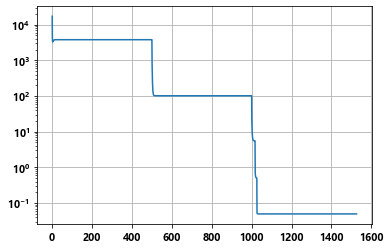

In [156]:
plt.semilogy(val_f)
plt.grid(True)
plt.show()

In [157]:
np.linalg.norm(beta_f-beta,2)

0.00023962326208139685

In [175]:
f(y,x,beta_r,mu,div)-f(y,x,beta,mu,div)

4.330699365485968e-05

In [173]:
beta_r[:10]

array([-1.75488346e+00,  4.08655804e-01, -2.47559639e-05, -4.94892300e-06,
        2.17446696e-06,  3.43396522e-05, -1.32634889e-06, -1.96206462e-05,
       -1.94920301e-05,  1.36270187e-05])

In [177]:
np.linalg.norm(beta_r-beta)-np.linalg.norm(beta_f-beta)

7.814666148418257e-05

In [116]:
y[:10]

array([-14.87533136,   6.49456383,  -7.0549657 , -17.25125056,
        -4.74785628,  -0.80796162, -10.0766024 ,   0.95622717,
        -2.60893117,  -4.34605832])

In [125]:
np.linalg.norm(y-np.dot(x,beta_f))

0.001119781342112775

In [127]:
np.dot(x,beta_f)[:10]

array([-14.87524265,   6.49451218,  -7.05489744, -17.25115369,
        -4.74789556,  -0.80808277, -10.07662031,   0.95622001,
        -2.60902611,  -4.34608205])

In [128]:
np.linalg.norm(beta)

10.90157451484927

In [141]:
np.sum(abs(beta_r))*1e-4

0.016979313783943458

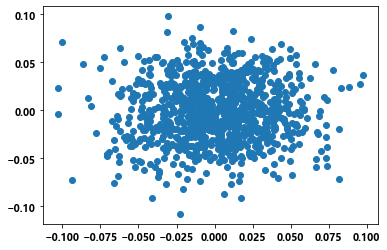

In [106]:
a = x[:,1]/np.linalg.norm(x[:,1])
b = x[:,0]/np.linalg.norm(x[:,0])
plt.scatter(a,b)
plt.show()